# Analysis of Space Missions:
*Organizations, Locations, Dates, Details, Rocket Status, Prices, and Mission Success*

***About The Data***

**Unnamed:** 0: This column seems to be an index column or a unique identifier for each entry in the dataset.

**Organisation:** This column indicates the organization or space agency responsible for the mission, such as SpaceX, CASC (China Aerospace Science and Technology Corporation), Roscosmos (Russian space agency), ULA (United Launch Alliance), or JAXA (Japan Aerospace Exploration Agency).

**Location:** This column provides the launch site or facility where the mission took place, including specific locations like LC-39A in Kennedy Space Center, Florida, USA; Site 9401 in Jiuquan Satellite Launch Center, China; Pad A in Boca Chica, Texas, USA; Site 200/39 in Baikonur Cosmodrome, Kazakhstan; SLC-41 in Cape Canaveral AFS, Florida, USA; LC-9 in Taiyuan Satellite Launch Center, China; Site 31/6 in Baikonur Cosmodrome, Kazakhstan; and LC-101 in Wenchang Satellite Launch Center, China.

**Date:** This column represents the date and time of the launch in a specific format (e.g., "Thu Aug 06, 2020 04:01 UTC").

**Detail:** This column provides additional details or descriptions of the mission, such as the type of rocket or spacecraft involved (e.g., Falcon 9 Block 5, Long March 2D, Starship Prototype, Proton-M/Briz-M, Atlas V 541, Long March 4B, Soyuz 2.1a) and the payload or satellites being launched.

**Rocket_Status:** This column indicates the status of the rocket or spacecraft, such as "StatusActive."

**Price:** This column specifies the price associated with the mission or launch. It appears to be given in some currency, although there are missing values in the dataset.

**Mission_Status:** This column denotes the outcome or status of the mission, whether it was a "Success" or not.

**These file are named:**
Mission_lounches.csv

**Meeting the library requirements**
In Jupyter Notebooks, you may encounter situations where you want to suppress warning messages that would normally be displayed. The warnings module in Python provides a way to control warning behavior in your code. By calling filterwarnings('ignore'), you instruct Python to ignore all warnings and not display them in the output.

This can be useful in certain situations where you want to suppress warnings that might be irrelevant or distracting for your specific task. However, it's important to note that ignoring warnings globally can sometimes hide important information about potential issues or bugs in your code. It's generally recommended to use caution when suppressing warnings and consider whether it's necessary for your particular use case.

In [79]:
import warnings
warnings.filterwarnings('ignore')

Run the following cell to install the required libraries. Let's break down the command and its components:

!: The exclamation mark (!) at the beginning of the line indicates that the command should be executed as a shell command, rather than as a Python statement.
pip3: pip3 is a package installer for Python 3, used to install Python packages from the Python Package Index (PyPI).
-q: The -q flag stands for "quiet" and is used to suppress output or progress messages during the installation process. It makes the installation process less verbose.
install: This keyword tells pip3 that you want to install packages.
numpy pandas matplotlib seaborn geopy folium datetime scipy sklearn tensorflow: These are the names of the packages you want to install.

In [80]:
# Importing the libraries installed

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime


import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from plotly.subplots import make_subplots

**Loading the data....**

In [81]:
lounches_data = pd.read_csv('./Data/mission_launches.csv')
display(lounches_data.head(10))

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


### Pre-processing the data
**Let's first see the information about the dataframe**

**Also Check Column Has Null Values**

In [82]:
print(lounches_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
None


In [83]:
print(type(lounches_data.loc[0,'Date']))
print(type(lounches_data.loc[0,'Price']))

<class 'str'>
<class 'str'>


## Change the type of the data in a column
**Column Date/Time shows the data type as object. To find which object is that, we print the type of data in the first cell of the Date/Time column. On doing that, we come to know - it's of string type.**

In [84]:
lounches_data['Price'] = lounches_data['Price'].str.replace(',', '').astype(float)
lounches_data['Date'] = pd.to_datetime(lounches_data['Date'],format = 'mixed', dayfirst = True)

In [85]:
display(lounches_data[['Date','Price']])

,Date,Price
0,2020-08-07 05:12:00+00:00,50.00
1,2020-08-06 04:01:00+00:00,29.75
2,2020-08-04 23:57:00+00:00,NaN
3,2020-07-30 21:25:00+00:00,65.00
4,2020-07-30 11:50:00+00:00,145.00
...,...,...
4319,1958-02-05 07:33:00+00:00,NaN
4320,1958-02-01 03:48:00+00:00,NaN
4321,1957-12-06 16:44:00+00:00,NaN
4322,1957-11-03 02:30:00+00:00,NaN


## Let's convert it to datetime format for easy indexing.

***pd.to_datetime(): This is a pandas function that converts a given input into a datetime object. It is used here to convert the values of the 'Date/Time' column to datetime format.***

In [86]:
for index, row in lounches_data.iterrows():
    lounches_data.at[index, 'Date'] = row['Date'].date()
display(lounches_data['Date'])

0       2020-08-07
1       2020-08-06
2       2020-08-04
3       2020-07-30
4       2020-07-30
           ...    
4319    1958-02-05
4320    1958-02-01
4321    1957-12-06
4322    1957-11-03
4323    1957-10-04
Name: Date, Length: 4324, dtype: object

In [87]:
print(type(lounches_data.loc[0,'Date']))
print(type(lounches_data.loc[0,'Price']))

<class 'datetime.date'>
<class 'numpy.float64'>


**Dropin this two column, Which is not required for analysis**

In [88]:
lounches_data = lounches_data.drop(lounches_data.columns[:2], axis=1)


**Extracting Country And Space Centre From Location.**

This code facilitates the extraction of country and Space Centre information from the 'Location' column and organizes it in a separate column, allowing for easier analysis and grouping based on countries and Space Centre in the project.

In [89]:
lounches_data['Country'] = lounches_data['Location'].apply(lambda row: row.split(",")[-1].strip()).astype(str)
lounches_data['Space_Centre'] = lounches_data['Location'].apply(lambda row: row.split(",")[1].strip()).astype(str)
print(lounches_data[['Location', 'Space_Centre','Country']])

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                                 ...   
4319           LC-18A, Cape Canaveral AFS, Florida, USA   
4320           LC-26A, Cape Canaveral AFS, Florida, USA   
4321           LC-18A, Cape Canaveral AFS, Florida, USA   
4322          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                         Space_Centre     Country  
0                Kennedy Space Center         USA  
1     Jiuquan Satellite Launch Center       China  
2                          Boca Chica         USA  
3                 Baikonur Cosmodrome  Kazakhstan  
4                  Cape Canaver

**Extracting ROCKET TYPE And MISSION NAME From Detail Column**

In [90]:
lounches_data['Rocket_type'] = lounches_data['Detail'].str.split('|').apply(lambda x: x[0])

lounches_data['Mission_Name'] = lounches_data['Detail'].str.split('|').apply(lambda x: x[1].strip())

print(lounches_data[['Rocket_type', 'Mission_Name']])

              Rocket_type                Mission_Name
0       Falcon 9 Block 5    Starlink V1 L9 & BlackSky
1          Long March 2D          Gaofen-9 04 & Q-SAT
2     Starship Prototype                150 Meter Hop
3        Proton-M/Briz-M   Ekspress-80 & Ekspress-103
4            Atlas V 541                 Perseverance
...                   ...                         ...
4319            Vanguard               Vanguard TV3BU
4320              Juno I                   Explorer 1
4321            Vanguard                 Vanguard TV3
4322      Sputnik 8K71PS                    Sputnik-2
4323      Sputnik 8K71PS                    Sputnik-1

[4324 rows x 2 columns]


In [91]:
lounches_data = lounches_data.reindex(columns=['Organisation', 'Country', 'Space_Centre', 'Date', 'Rocket_type', 'Mission_Name', 'Rocket_Status', 'Mission_Status', 'Price'])
display(lounches_data)

,Organisation,Country,Space_Centre,Date,Rocket_type,Mission_Name,Rocket_Status,Mission_Status,Price
0,SpaceX,USA,Kennedy Space Center,2020-08-07,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,Success,50.00
1,CASC,China,Jiuquan Satellite Launch Center,2020-08-06,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,Success,29.75
2,SpaceX,USA,Boca Chica,2020-08-04,Starship Prototype,150 Meter Hop,StatusActive,Success,NaN
3,Roscosmos,Kazakhstan,Baikonur Cosmodrome,2020-07-30,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,Success,65.00
4,ULA,USA,Cape Canaveral AFS,2020-07-30,Atlas V 541,Perseverance,StatusActive,Success,145.00
...,...,...,...,...,...,...,...,...,...
4319,US Navy,USA,Cape Canaveral AFS,1958-02-05,Vanguard,Vanguard TV3BU,StatusRetired,Failure,NaN
4320,AMBA,USA,Cape Canaveral AFS,1958-02-01,Juno I,Explorer 1,StatusRetired,Success,NaN
4321,US Navy,USA,Cape Canaveral AFS,1957-12-06,Vanguard,Vanguard TV3,StatusRetired,Failure,NaN
4322,RVSN USSR,Kazakhstan,Baikonur Cosmodrome,1957-11-03,Sputnik 8K71PS,Sputnik-2,StatusRetired,Success,NaN


In [92]:
lounches_data.describe()

,Price
count,964.000000
mean,153.792199
std,288.450732
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,5000.000000


## Visualising the data
**Let's Visualise the Success rate And Failure rate ans also Which Organisation has Highest Success rate and Highest Failure rate**

<Figure size 2000x600 with 0 Axes>

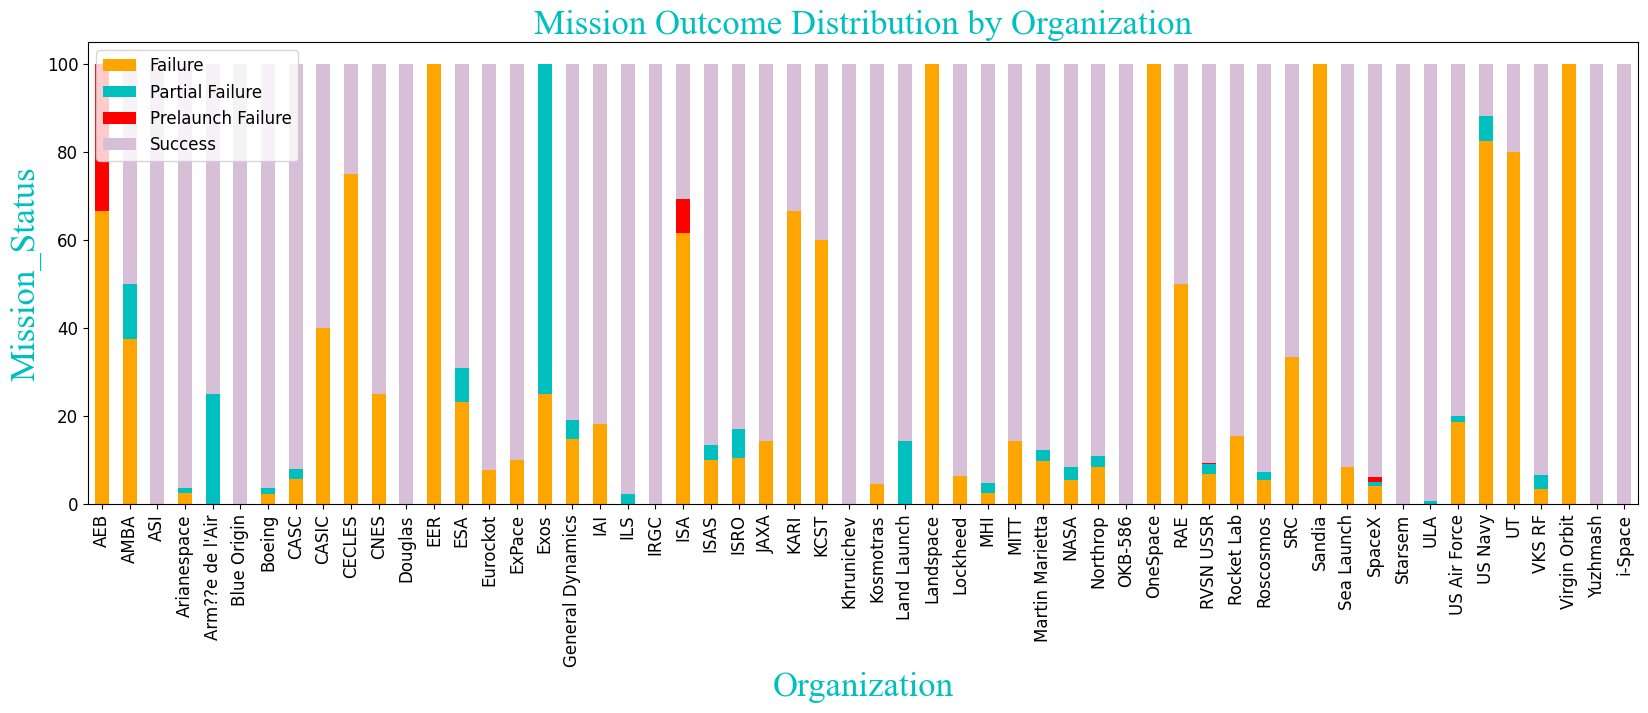

In [93]:
organization_counts = lounches_data['Organisation'].value_counts()
outcome_counts = lounches_data.groupby('Organisation')['Mission_Status'].value_counts(normalize=True).unstack()

outcome_percentages = outcome_counts.mul(100)
c= ['#FFA500','c','r','#D8BFD8']
plt.figure(figsize=(20, 6))
outcome_percentages.plot(kind='bar', stacked=True, figsize=(20, 6),color = c)

plt.xlabel('Organization',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.ylabel('Mission_Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.title('Mission Outcome Distribution by Organization',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)

plt.xticks(rotation=90)
plt.legend()

plt.show()


In [94]:
total_launches = len(lounches_data)

#filter at leat mission will be there 

# Find the organization with the highest rate for each status
max_success_org = lounches_data[lounches_data['Mission_Status'] == 'Success'].groupby('Organisation')['Mission_Status'].count().div(lounches_data.groupby('Organisation')['Mission_Status'].count()).idxmax()
max_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Failure'].groupby('Organisation')['Mission_Status'].count().div(lounches_data.groupby('Organisation')['Mission_Status'].count()).idxmax()
max_partial_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Partial Failure'].groupby('Organisation')['Mission_Status'].count().div(lounches_data.groupby('Organisation')['Mission_Status'].count()).idxmax()
max_prelaunch_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Prelaunch Failure'].groupby('Organisation')['Mission_Status'].count().div(lounches_data.groupby('Organisation')['Mission_Status'].count()).idxmax()

# Print the organizations with the highest rate for each status
print("Organization with the highest success rate: ", max_success_org)
print("Organization with the highest failure rate: ", max_failure_org)
print("Organization with the highest partial failure rate: ", max_partial_failure_org)
print("Organization with the highest pre-launch failure rate: ", max_prelaunch_failure_org)

Organization with the highest success rate:  ASI
Organization with the highest failure rate:  EER
Organization with the highest partial failure rate:  Exos
Organization with the highest pre-launch failure rate:  AEB


In [95]:

# Find the organization with the highest rate for each status
max_success_org = lounches_data[lounches_data['Mission_Status'] == 'Success'].groupby('Country')['Mission_Status'].count().div(lounches_data.groupby('Country')['Mission_Status'].count()).idxmax()
max_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Failure'].groupby('Country')['Mission_Status'].count().div(lounches_data.groupby('Country')['Mission_Status'].count()).idxmax()
max_partial_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Partial Failure'].groupby('Country')['Mission_Status'].count().div(lounches_data.groupby('Country')['Mission_Status'].count()).idxmax()
max_prelaunch_failure_org = lounches_data[lounches_data['Mission_Status'] == 'Prelaunch Failure'].groupby('Country')['Mission_Status'].count().div(lounches_data.groupby('Country')['Mission_Status'].count()).idxmax()

# Print the organizations with the highest rate for each status
print("Country with the highest success rate: ", max_success_org)
print("Country with the highest failure rate: ", max_failure_org)
print("Country with the highest partial failure rate: ", max_partial_failure_org)
print("Country with the highest pre-launch failure rate: ", max_prelaunch_failure_org)

Country with the highest success rate:  Gran Canaria
Country with the highest failure rate:  Pacific Missile Range Facility
Country with the highest partial failure rate:  New Mexico
Country with the highest pre-launch failure rate:  Brazil


In [96]:
success_count = lounches_data[lounches_data['Mission_Status'] == 'Success'].shape[0]

failure_count = lounches_data[lounches_data['Mission_Status'] == 'Failure'].shape[0]
Partial_failure_count = lounches_data[lounches_data['Mission_Status'] == 'Partial Failure'].shape[0]
Pre_Launch_failure_count = lounches_data[lounches_data['Mission_Status'] == 'Prelaunch Failure'].shape[0]

success_rate = (success_count / len(lounches_data)) * 100

failure_rate = (failure_count / len(lounches_data)) * 100

partial_failure_rate = (Partial_failure_count / len(lounches_data)) * 100

prelaunch_failure_rate = (Pre_Launch_failure_count / len(lounches_data)) * 100

print("Success rate: {:.2f}%".format(success_rate))
print("Failure rate: {:.2f}%".format(failure_rate))
print("Partial_failure_rate: {:.2f}%".format(partial_failure_rate))
print("Prelaunch_failure_rate: {:.2f}%".format(prelaunch_failure_rate))


Success rate: 89.71%
Failure rate: 7.84%
Partial_failure_rate: 2.36%
Prelaunch_failure_rate: 0.09%


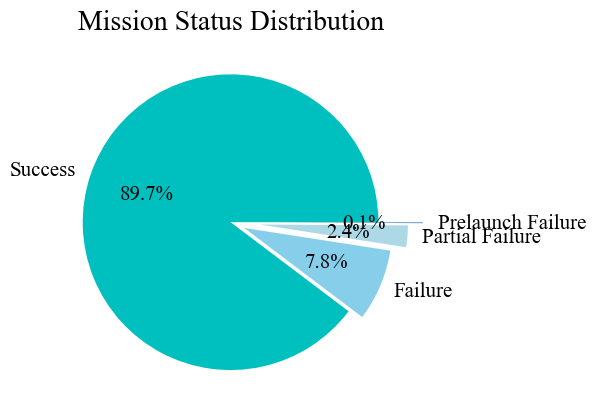

In [97]:
status_counts = lounches_data['Mission_Status'].value_counts()
ex = [0, 0.1, 0.2, 0.3]
c = ['c','skyblue', 'lightblue', 'steelblue']

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=c, explode=ex, radius=1, textprops={'fontsize': 15, 'fontname': 'Times New Roman'})

plt.title('Mission Status Distribution', fontname='Times New Roman', color='black', size=20)

plt.show()

In [98]:
organization_counts = lounches_data['Organisation'].value_counts()

top_10_organizations = organization_counts.head(10)

print("Top 10 most frequent organizations:")
print(top_10_organizations)

Top 10 most frequent organizations:
Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64


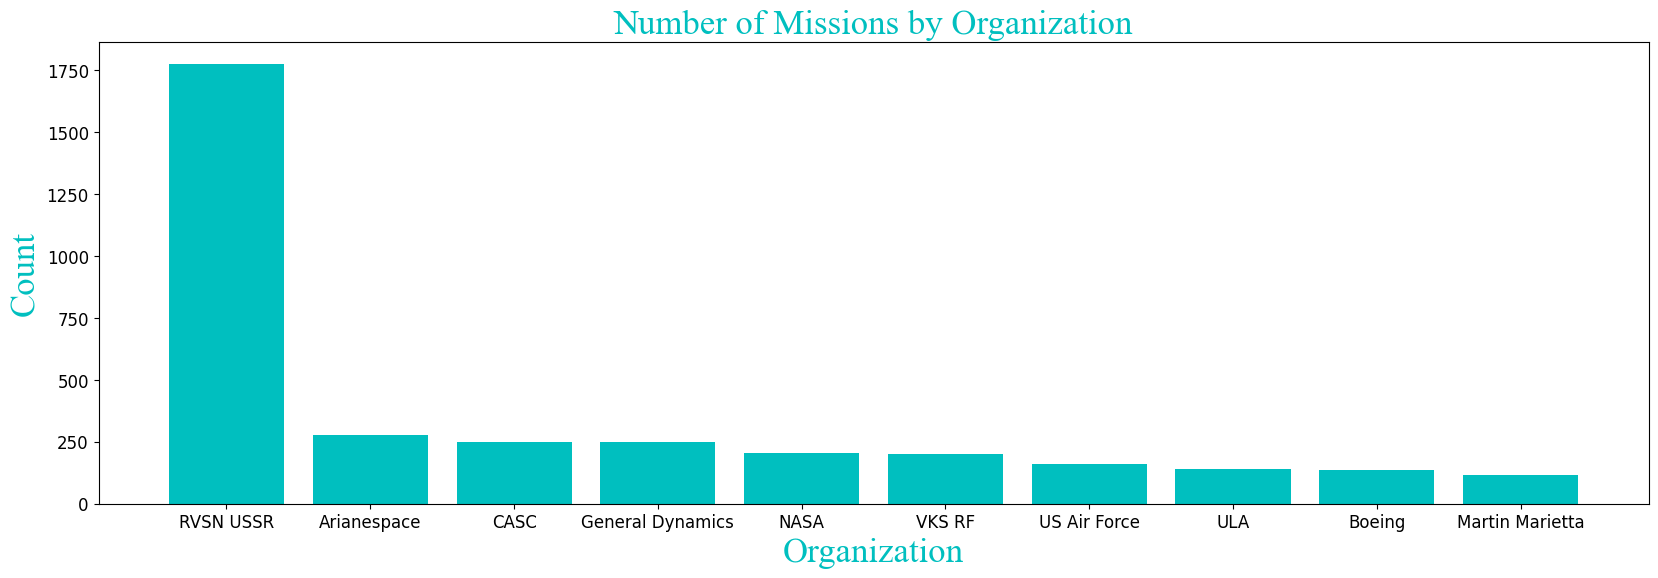

In [99]:
organization_counts = lounches_data['Organisation'].value_counts().head(10)

plt.figure(figsize=(20, 6))
plt.bar(organization_counts.index, organization_counts.values, align='center', color='c')

plt.xlabel('Organization', fontname='Times New Roman', color='c', size=25)
plt.ylabel('Count', fontname='Times New Roman', color='c', size=25)
plt.title('Number of Missions by Organization', fontname='Times New Roman', color='c', size=25)

plt.xticks(rotation=0)

plt.show()

In [100]:
launch_location_counts = lounches_data['Space_Centre'].value_counts()

top_launch_locations = launch_location_counts.head(5)

print("Top", 5, "most frequent launch sites:")
print(top_launch_locations)


Top 5 most frequent launch sites:
Space_Centre
Plesetsk Cosmodrome    1263
Baikonur Cosmodrome     701
Cape Canaveral AFS      658
Vandenberg AFB          442
Guiana Space Centre     299
Name: count, dtype: int64


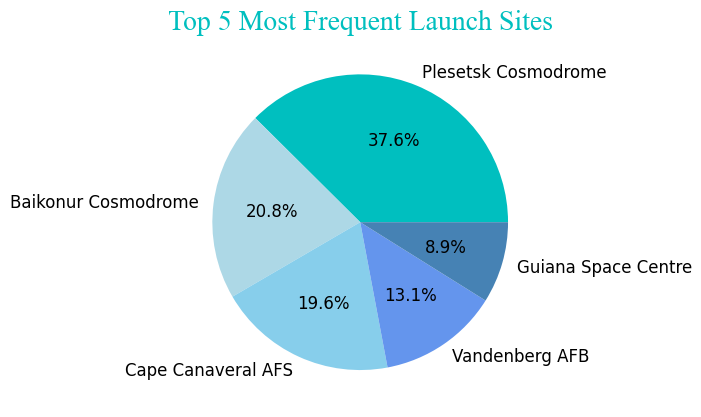

In [101]:
c = ['c', 'lightblue','skyblue','cornflowerblue','steelblue']
plt.pie(top_launch_locations, labels=top_launch_locations.index, autopct='%1.1f%%',colors=c)

# Set the title
plt.title('Top 5 Most Frequent Launch Sites',fontname='Times New Roman',color = 'c',size = 20)

# Display the plot
plt.show()

In [102]:

launch_country_counts = lounches_data['Country'].value_counts()

print("\nTop 5 Launches per country:")
print(launch_country_counts.head(7))


Top 5 Launches per country:
Country
Russia        1395
USA           1344
Kazakhstan     701
France         303
China          268
Japan          126
India           76
Name: count, dtype: int64


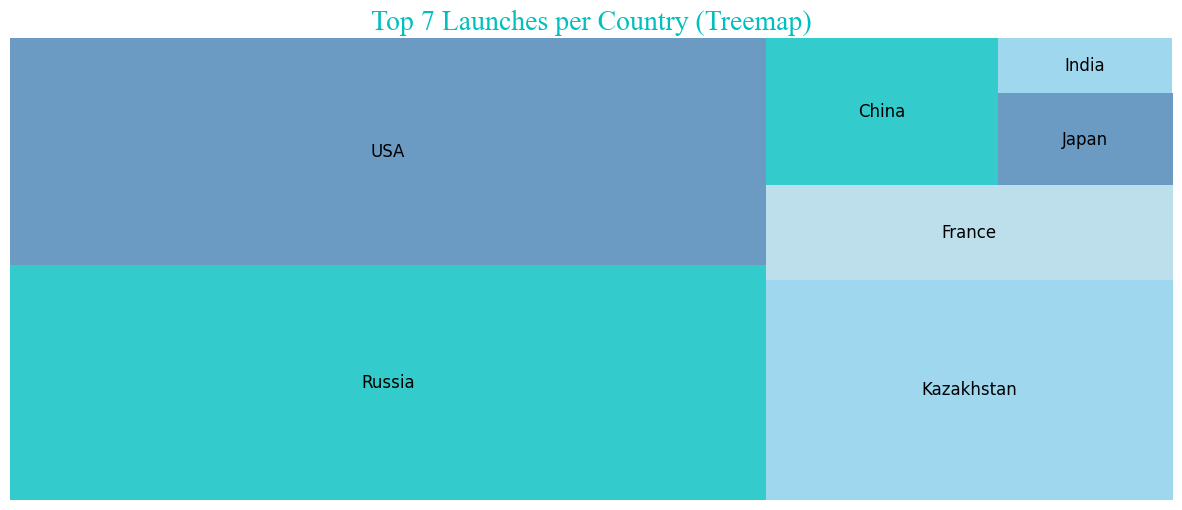

In [103]:
import squarify
labels = launch_country_counts.head(7).index
sizes = launch_country_counts.head(7).values
c = ['c','steelblue','skyblue', 'lightblue','c','steelblue','skyblue']
# Create the treemap
plt.figure(figsize=(15, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8,color = c)

# Set the title and remove axis labels
plt.title('Top 7 Launches per Country (Treemap)',fontname='Times New Roman',color = 'c',size = 20)
plt.axis('off')

# Display the treemap
plt.show()

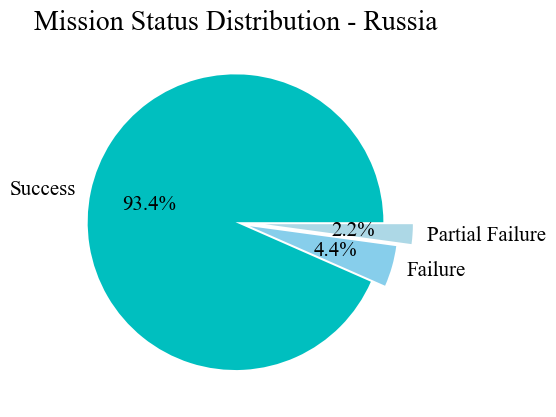

Text(0.5, 1.0, 'Mission Status Distribution - India')

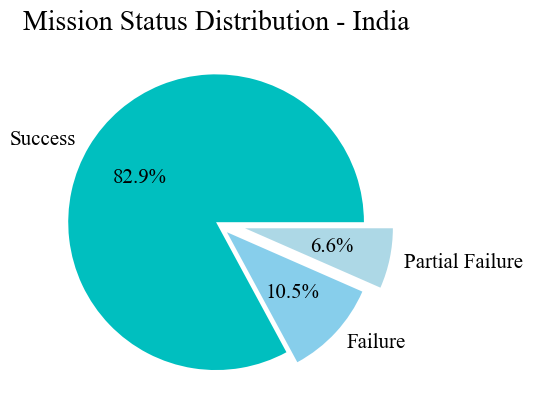

In [104]:
russia_launches = lounches_data[lounches_data['Country'] == 'Russia']

russia_status_counts = russia_launches['Mission_Status'].value_counts()

ex = [0, 0.1, 0.2]
c = ['c', 'skyblue', 'lightblue', 'steelblue']
plt.pie(russia_status_counts, labels=russia_status_counts.index, autopct='%1.1f%%', colors=c, explode=ex, radius=1, textprops={'fontsize': 15, 'fontname': 'Times New Roman'})

plt.title("Mission Status Distribution - Russia", fontname='Times New Roman', color='black', size=20)
plt.show()

india_launches = lounches_data[lounches_data['Country'] == 'India']

india_status_counts = india_launches['Mission_Status'].value_counts()

ex = [0, 0.1, 0.2]
c = ['c', 'skyblue', 'lightblue', 'steelblue']
plt.pie(india_status_counts, labels=india_status_counts.index, autopct='%1.1f%%', colors=c, explode=ex, radius=1, textprops={'fontsize': 15, 'fontname': 'Times New Roman'})

plt.title("Mission Status Distribution - India", fontname='Times New Roman',color='black', size=20)


In [111]:
# Filter the launches for India with mission status as failure
india_failures = lounches_data[(lounches_data['Country'] == 'India') & (lounches_data['Mission_Status'] == 'Failure')]

# Get the list of rocket names with failures in India
rocket_failures = india_failures['Rocket_type'].tolist()
print(rocket_failures)

['PSLV-XL ', 'GSLV Mk I ', 'GSLV Mk II ', 'GSLV Mk I ', 'PSLV-G ', 'ASLV ', 'ASLV ', 'SLV-3 ']


In [112]:
lounches_data['Date'] = pd.to_datetime(lounches_data['Date'])
missions_by_year = lounches_data.groupby(lounches_data['Date'].dt.year).size().sort_values(ascending=False)
missions_by_year = missions_by_year.head(10)
print("Top 10 Lounches:")
print(missions_by_year)

Top 10 Lounches:
Date
1971    119
2018    117
1977    114
1976    113
1975    113
2019    109
1970    107
1967    106
1968    103
1969    103
dtype: int64


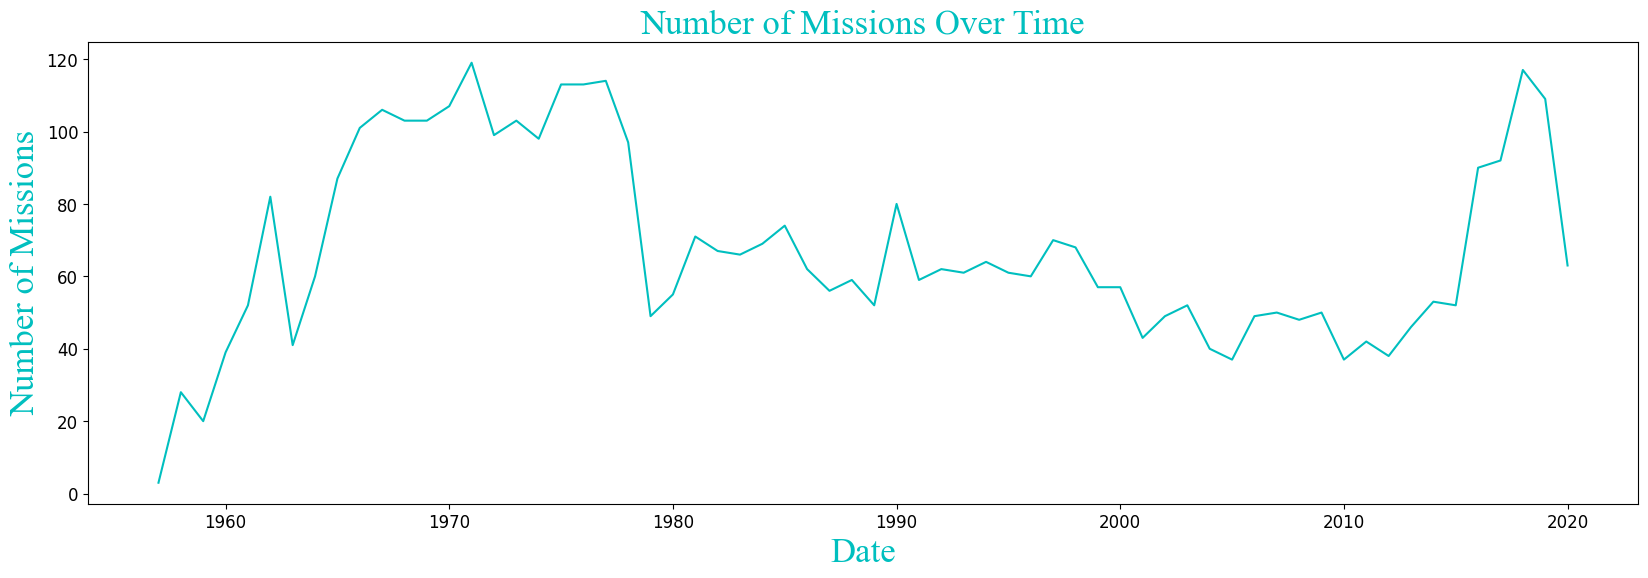

In [113]:
lounches_data['Year'] = lounches_data['Date'].apply(lambda x: x.year)
missions_by_date = lounches_data.groupby('Year').size()

plt.figure(figsize=(20, 6))
missions_by_date.plot(kind='line',color = 'c')
plt.xlabel('Date',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.ylabel('Number of Missions',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.title('Number of Missions Over Time',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)

plt.show()

<Figure size 2000x600 with 0 Axes>

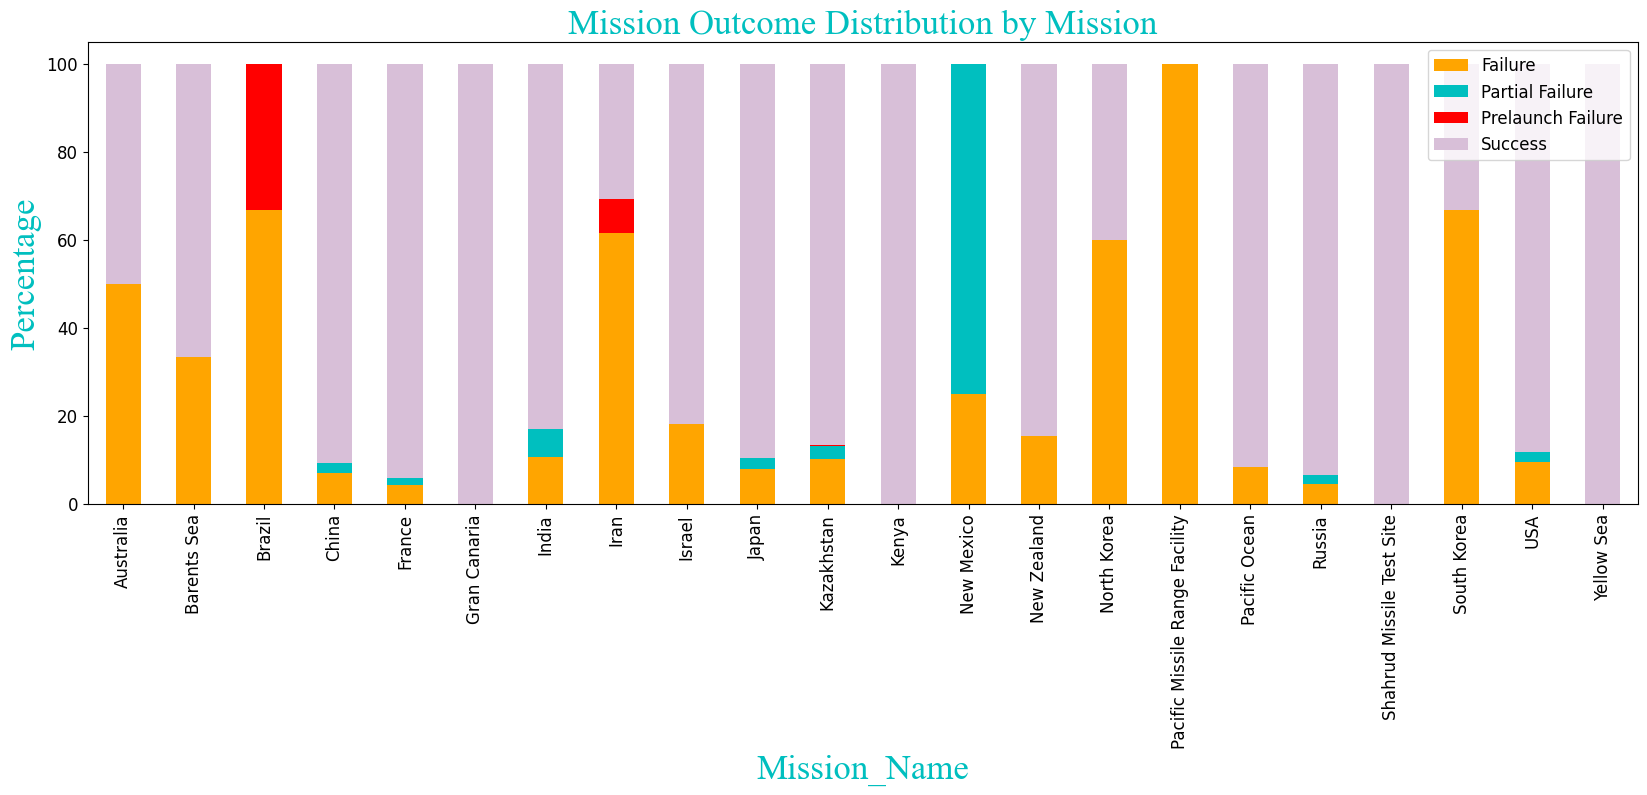

In [114]:

organization_counts = lounches_data['Country'].value_counts()
outcome_counts = lounches_data.groupby('Country')['Mission_Status'].value_counts(normalize=True).unstack()

outcome_percentages = outcome_counts.mul(100)
c= ['#FFA500','c','r','#D8BFD8']
plt.figure(figsize=(20, 6))
outcome_percentages.plot(kind='bar', stacked=True, figsize=(20, 6),color = c)

plt.xlabel('Mission_Name',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.ylabel('Percentage',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)
plt.title('Mission Outcome Distribution by Mission',fontname = 'TIMES NEW ROMAN', color= 'c',size =25)

plt.xticks(rotation=90)
plt.legend()

plt.show()


In [115]:
# Filter the data for only active and retired rocket statuses
active_data = lounches_data[lounches_data['Rocket_Status'] == 'StatusActive']
retired_data = lounches_data[lounches_data['Rocket_Status'] == 'StatusRetired']

# Group the active and retired data by Rocket Type and count the occurrences
active_count = active_data.groupby('Rocket_type').size().reset_index(name='Active_Count')
retired_count = retired_data.groupby('Rocket_type').size().reset_index(name='Retired_Count')

# Sort the counts in descending order and get the top 10 for active and retired
top_active = active_count.nlargest(10, 'Active_Count')
top_retired = retired_count.nlargest(10, 'Retired_Count')

# Print the top 10 rocket types with the most active rocket statuses
print("Top 10 Rocket Types with the Most Active Rocket Statuses:")
print(top_active)
print()

# Print the top 10 rocket types with the most retired rocket statuses
print("Top 10 Rocket Types with the Most Retired Rocket Statuses:")
print(top_retired)


Top 10 Rocket Types with the Most Active Rocket Statuses:
          Rocket_type  Active_Count
3       Ariane 5 ECA             75
33     Long March 2C             38
4        Atlas V 401             37
95        Zenit-3 SL             36
19  Falcon 9 Block 5             34
35     Long March 2D             33
23         H-IIA 202             29
65        Pegasus XL             29
42   Long March 3B/E             25
64           PSLV-XL             22

Top 10 Rocket Types with the Most Retired Rocket Statuses:
               Rocket_type  Retired_Count
67     Cosmos-3M (11K65M)             446
247               Voskhod             299
139   Molniya-M /Block ML             128
65       Cosmos-2I (63SM)             126
197               Soyuz U             125
243             Tsyklon-3             122
241             Tsyklon-2             106
251             Vostok-2M              93
137  Molniya-M /Block 2BL              87
89          Delta II 7925              62


***Let's Visualise the Mission Distribution Through PIE CHART***

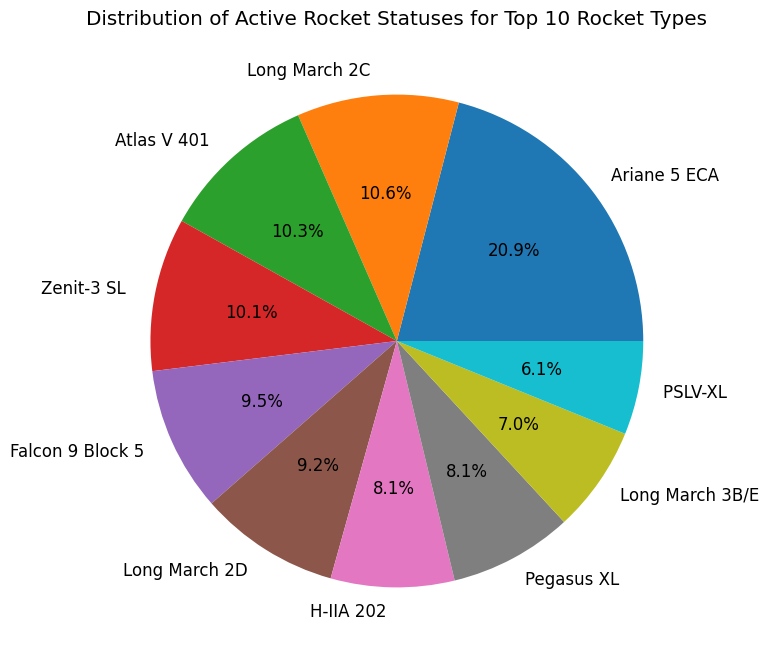

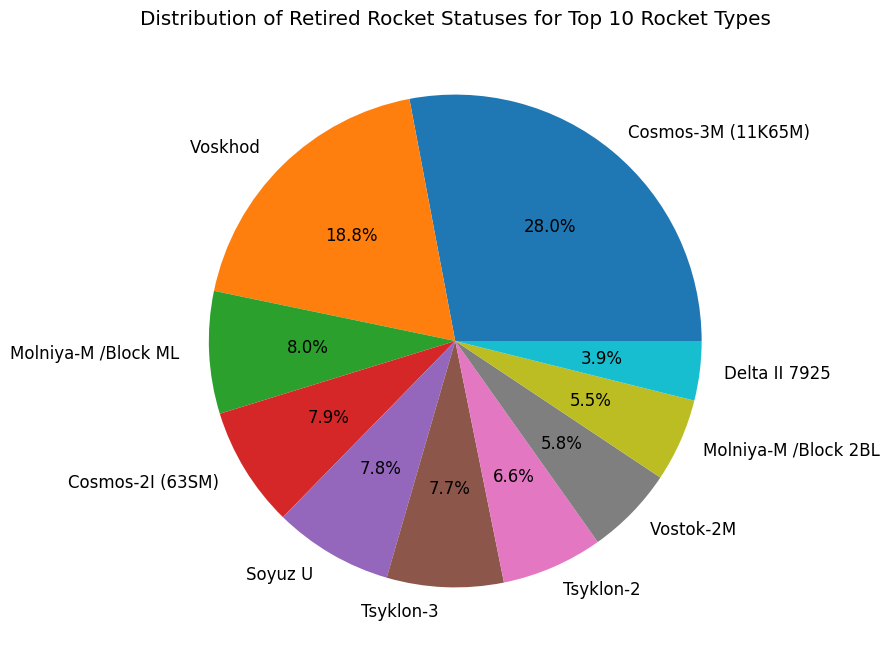

In [117]:
# Create a pie chart for the top 10 rocket types with active rocket statuses
plt.figure(figsize=(8, 8))
plt.pie(top_active['Active_Count'], labels=top_active['Rocket_type'], autopct='%1.1f%%')
plt.title('Distribution of Active Rocket Statuses for Top 10 Rocket Types')
plt.show()

# Create a pie chart for the top 10 rocket types with retired rocket statuses
plt.figure(figsize=(8, 8))
plt.pie(top_retired['Retired_Count'], labels=top_retired['Rocket_type'], autopct='%1.1f%%')
plt.title('Distribution of Retired Rocket Statuses for Top 10 Rocket Types')
plt.show()


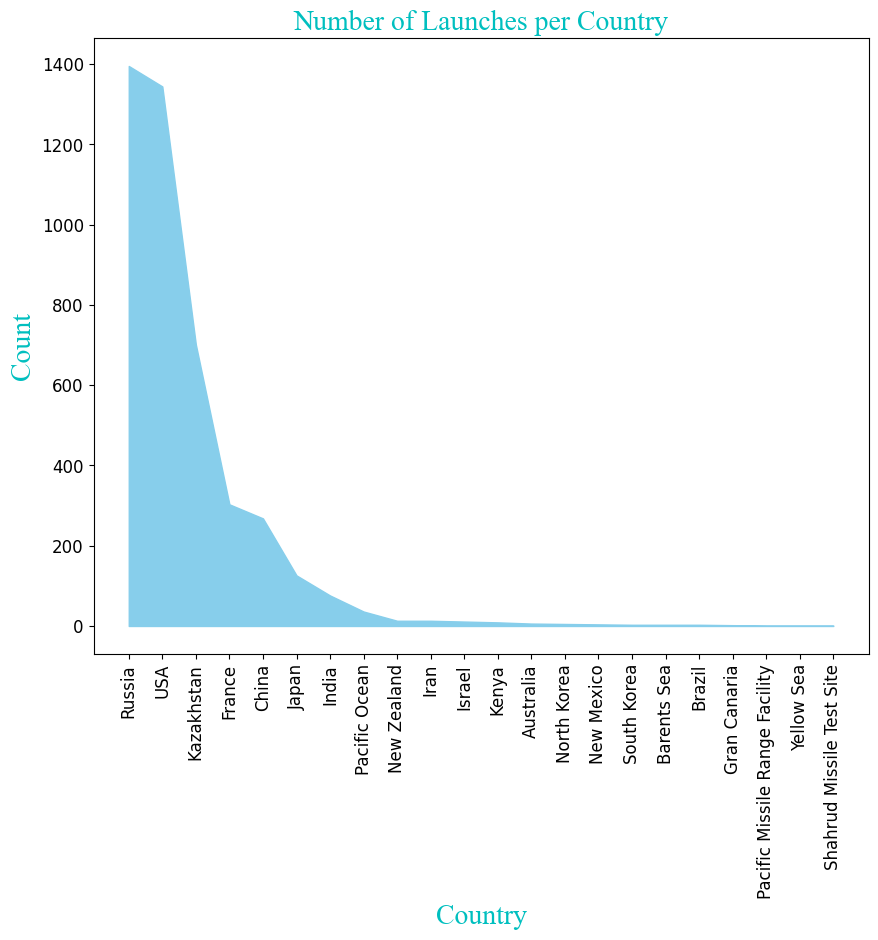

In [118]:
country_counts = lounches_data['Country'].value_counts()

plt.figure(figsize=(10, 8))
plt.fill_between(country_counts.index, country_counts, color='skyblue')

plt.xlabel('Country',fontname = 'times new roman',color = 'c', size = 20)
plt.ylabel('Count',fontname = 'times new roman',color = 'c', size = 20)
plt.title('Number of Launches per Country',fontname = 'times new roman',color = 'c', size = 20)

plt.xticks(rotation=90)

plt.show()

***Rocket Status Distribution***

In [119]:
rocket_status_counts = lounches_data['Rocket_Status'].value_counts()

print("Rocket Status Distribution:")
print(rocket_status_counts)

Rocket Status Distribution:
Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


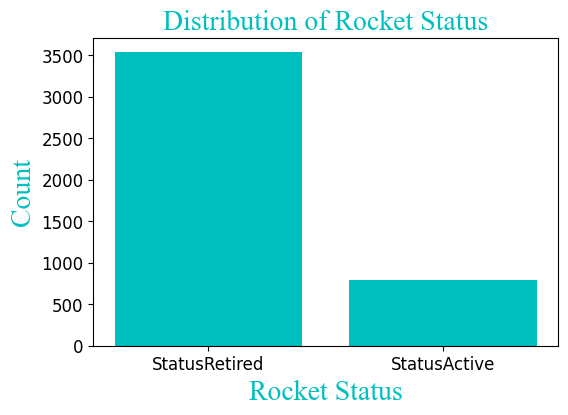

In [120]:
rocket_status_counts = lounches_data['Rocket_Status'].value_counts()

plt.figure(figsize=(6, 4)) 
plt.bar(rocket_status_counts.index, rocket_status_counts.values,color = 'c')

plt.xlabel('Rocket Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)
plt.ylabel('Count',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)
plt.title('Distribution of Rocket Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)

plt.show()